
<img style="float: left;;" src='alinco.png' /></a>
    

# <center> <font color= #000047> Aprendizaje No Superviado: Kmeans Clustering Imagenes </font> </center>


Elegir una imagen en blanco y negro de la carpeta `Imagenes` donde se puedan distinguir diferentes figuras para agrupar. Leer la imagen en una matriz de numpy. Definir y reescribir la matriz para tener pixeles en alto o en bajo. Encontrar las coordenadas en donde la matriz tiene pixeles negros. Aplicar el algoritmo de Kmeans sobre el arreglo de coordenadas usando el numero de agrupaciones necesarias de acuerdo a la imagen. Reconstruir la imagen identificando las figuras asociadas a cada grupo.

<div class="alert alert-danger" style="margin: 10px"><strong>NOTA IMPORTANTE!</strong> En cada figura, tabla, o resultado que se incluya, se debe de incluir el código que se utilizó para obtenerlo.  <br> Todas las figuras (si las hubiera) deben de estar comentadas o descritas.</div>

============================== Lectura de imagen, conversión a matriz ==============================
Tipo de datos: uint8
Dimensiones: (593, 584)
Tamaño: 346312 elementos


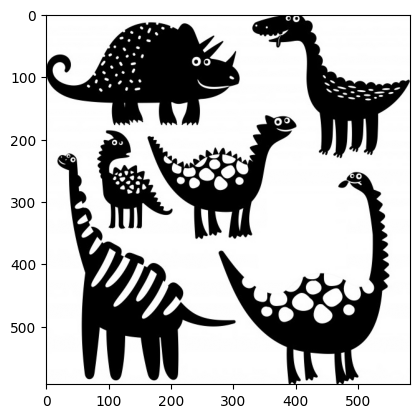

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('Imagenes/danosorios.jpg', cv2.IMREAD_GRAYSCALE) #Lee la imagen y la convierte a escala de grises
print(f"{"=="*15} Lectura de imagen, conversión a matriz {"=="*15}")
print(f"Tipo de datos: {imagen.dtype}")
print(f"Dimensiones: {imagen.shape}")
print(f"Tamaño: {imagen.size} elementos")
plt.imshow(imagen, cmap="gray")
plt.show()


============================== Definir y reescribir la matriz para tener pixeles en alto o en bajo ==============================
Matriz binaria:
 [[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


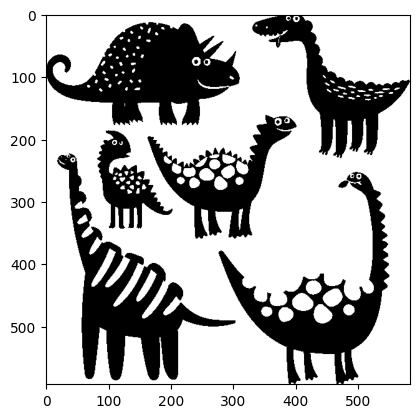

In [52]:
print(f"{"=="*15} Definir y reescribir la matriz para tener pixeles en alto o en bajo {"=="*15}")

#Umbral binario: si pixel < 128 -> 0 (negro), si no -> 1 (blanco)
#Convierte la imagen en escala de grises a una imagen binaria(blanco y negro)
_, binary = cv2.threshold(imagen, 128, 1, cv2.THRESH_BINARY) 

print("Matriz binaria:\n", binary)
plt.imshow(binary, cmap="gray")
plt.show()

In [53]:
print(f"{"=="*15} Encuentra todas las coordenadas de los pixeles negros en la imagen {"=="*15}")
coords = np.column_stack(np.where(binary == 0))

print("Primeras coordenadas negras:\n", coords[:10])
print("Total de pixeles negros:", len(coords))

============================== Encuentra todas las coordenadas de los pixeles negros en la imagen ==============================
Primeras coordenadas negras:
 [[  0 391]
 [  0 392]
 [  0 393]
 [  0 394]
 [  0 395]
 [  0 396]
 [  0 397]
 [  0 398]
 [  0 399]
 [  0 400]]
Total de pixeles negros: 115490


============================== Criterios de selección de grupos==============================


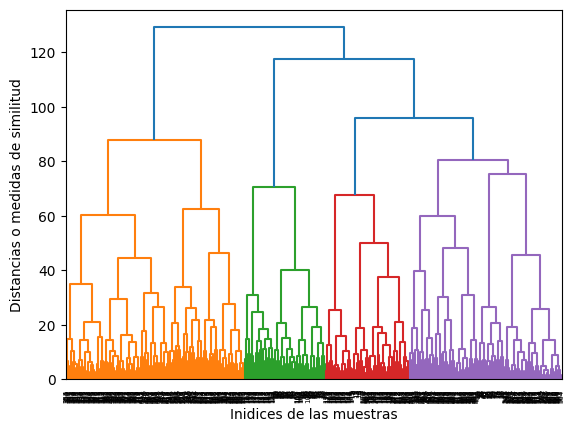

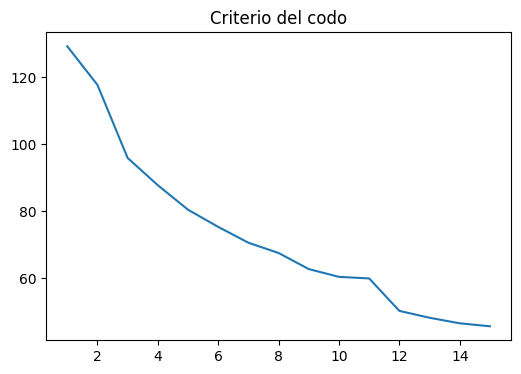

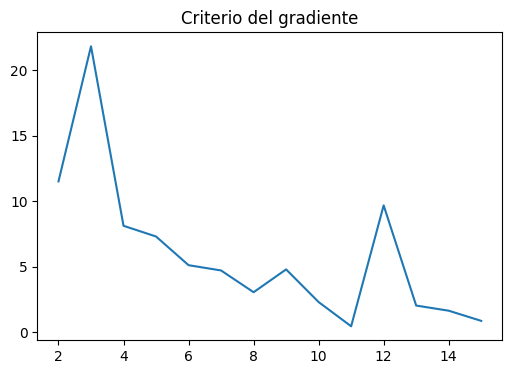

In [54]:
print(f"{"=="*15} Criterios de selección de grupos{"=="*15}")
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

z = hierarchy.linkage(binary, metric='euclidean', method='ward')
dn = hierarchy.dendrogram(z)
plt.xlabel('Inidices de las muestras')
plt.ylabel('Distancias o medidas de similitud')

last = z[-15:, 2]
last_rev = last[::-1]
inds = np.arange(1, len(last_rev)+1)

plt.figure(figsize=(6,4))
plt.title("Criterio del codo")
plt.plot(inds, last_rev)
plt.show()

gradiente = np.diff(last)
grad_rev = gradiente[::-1]
plt.figure(figsize=(6,4))
plt.title("Criterio del gradiente")
plt.plot(inds[1:], grad_rev)
plt.show()

============================== Aplica KMeans a las coordenadas de pixeles con 12 grupos ==============================


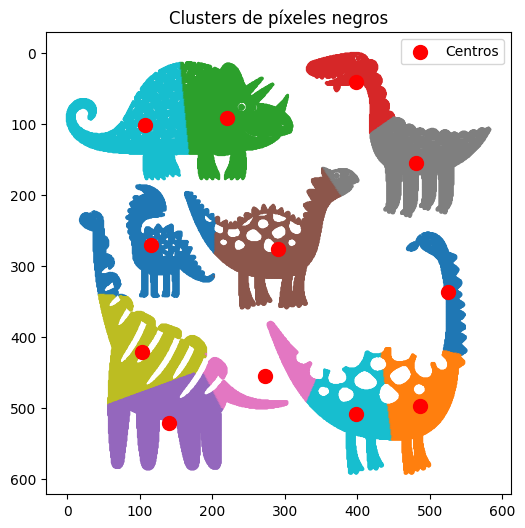

In [55]:
print(f"{"=="*15} Aplica KMeans a las coordenadas de pixeles con 12 grupos {"=="*15}")
from sklearn.cluster import KMeans

# Número de grupos segun las figuras que estan en la imagen
grupos = 12

#KMeans a las coordenadas de pixeles negros
kmeans = KMeans(n_clusters=grupos, random_state=0).fit(coords)
labels = kmeans.labels_
centros = kmeans.cluster_centers_

#print("Centros de los clusters:\n", centros)
plt.figure(figsize=(6,6))
plt.scatter(coords[:,1], coords[:,0], c=labels, cmap="tab10", s=1)  # coordenadas (x=columna, y=fila)
plt.scatter(centros[:,1], centros[:,0], c="red", marker="o", s=100, label="Centros")
plt.gca().invert_yaxis()  # para que coincida con la imagen original
plt.legend()
plt.title("Clusters de píxeles negros")
plt.show()

============================== Reconstruir la imagen identificando las figuras asociadas a cada grupo ==============================


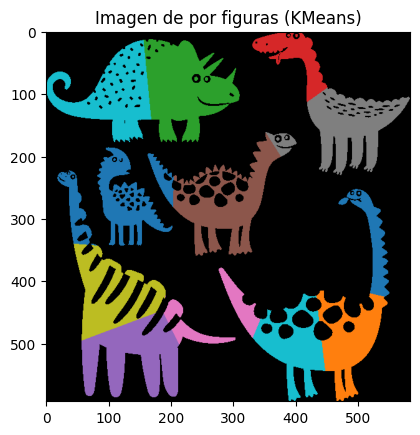

In [56]:
print(f"{"=="*15} Reconstruir la imagen identificando las figuras asociadas a cada grupo {"=="*15}")
clustered_img = np.zeros((binary.shape[0], binary.shape[1], 3), dtype=np.uint8)
colors = plt.cm.tab10(np.linspace(0, 1, grupos))[:, :3] * 255

for i, (y, x) in enumerate(coords):
    clustered_img[y, x] = colors[labels[i]]

plt.imshow(clustered_img)
plt.title("Imagen de por figuras (KMeans)")
plt.show()
